In [3]:
from data_loader import get_mnist_loaders
from training import greedy_layerwise_pretraining, supervised_training, train_baseline_model
from time import time
from visualization import (convert_seconds_to_mmss, visualize_weights, plot_model_performance, plot_loss_curves, plot_accuracy_curves, plot_confusion_matrices, 
plot_training_time, visualize_weights_evolution, plot_weight_differences, generate_comparison_table)

#def main():
# Load data
print("Step 1: Data loading")
start_time = time()
train_loader, test_loader = get_mnist_loaders()
step_1_time = time()

elapsed_time = step_1_time - start_time

formatted_time = convert_seconds_to_mmss(elapsed_time)

print("End Step 1: Data loading time = {} minutes".format(formatted_time))
print("End Step 1: Data loading time = {:.2f} seconds".format(step_1_time - start_time))

# Train baseline model
print("Step 2: Baseline training")
baseline_accuracy, baseline_losses, baseline_times, baseline_weights, baseline_preds, true_labels = train_baseline_model(train_loader, test_loader)
step_2_time = time()
print("End Step 2: Baseline training time = {:.2f} seconds".format(step_2_time - step_1_time))

# Greedy layer-wise unsupervised pretraining
print("Step 3: Unsupervised pretraining")
pretrained_model, pretrained_losses, pretrained_times, pretrained_weights, pretrained_preds = greedy_layerwise_pretraining(train_loader,test_loader)
step_3_time = time()
print("End Step 3: Unsupervised pretraining time = {:.2f} seconds".format(step_3_time - step_2_time))

# Supervised fine-tuning
print("Step 4: Supervised fine-tuning")
final_model, final_accuracy, final_losses, final_times, final_weights, final_preds, _ = \
supervised_training(pretrained_model, train_loader, test_loader)
step_4_time = time()
print("End Step 4: Supervised fine-tuning time = {:.2f} seconds".format(step_4_time - step_3_time))

#if __name__ == "__main__":
#    main()


SyntaxError: invalid syntax (290836787.py, line 1)

| Metric                 | Baseline Model                                                         | Supervised Model                                                       | Difference (Δ)                                                                                                                                                                               |
|:-----------------------|:-----------------------------------------------------------------------|:-----------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Overall Accuracy (%)   | 9732.0                                                                 | 9737.0                                                                 | 5.0                                                                                                

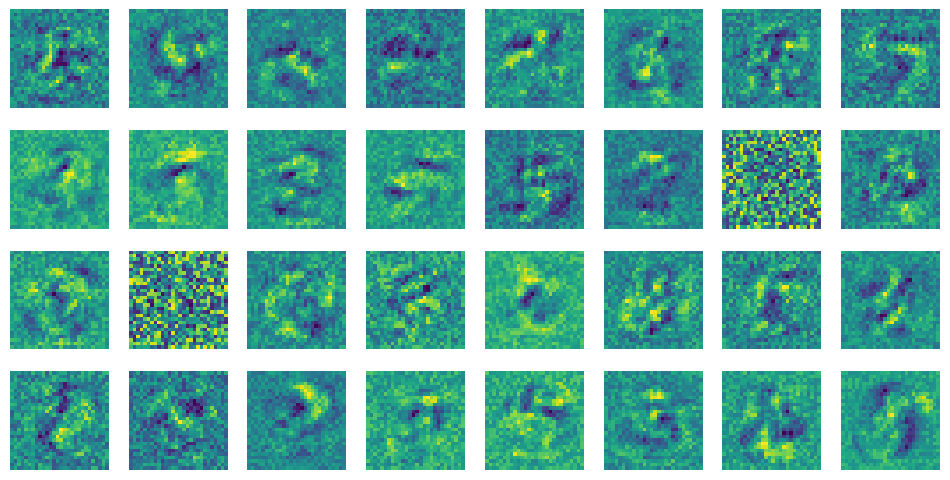

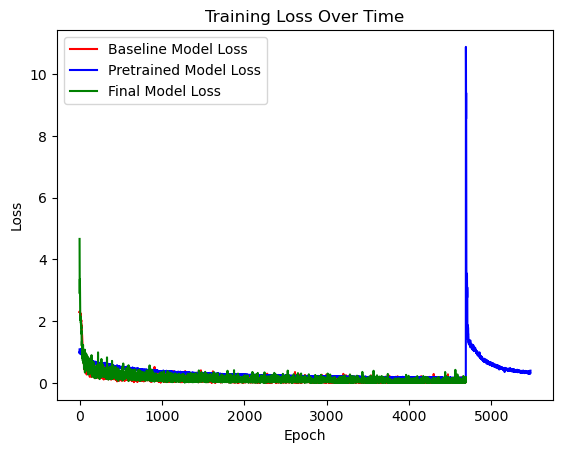

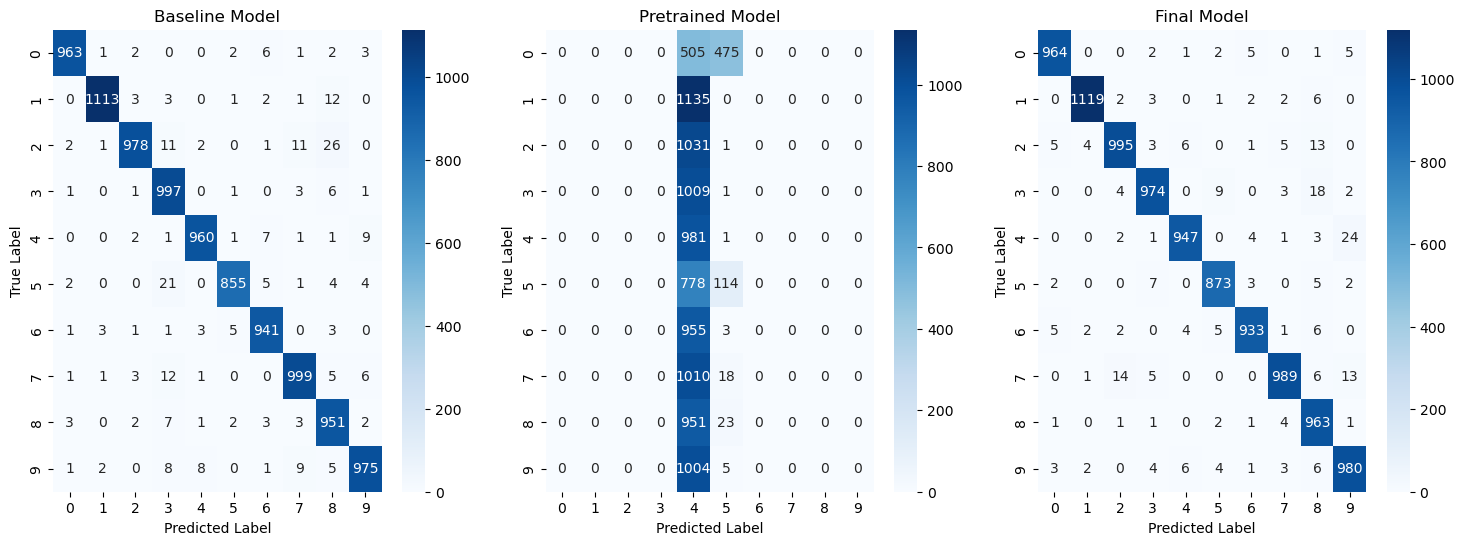

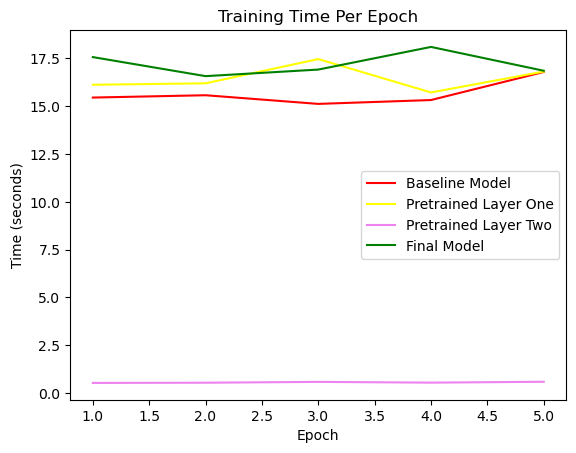

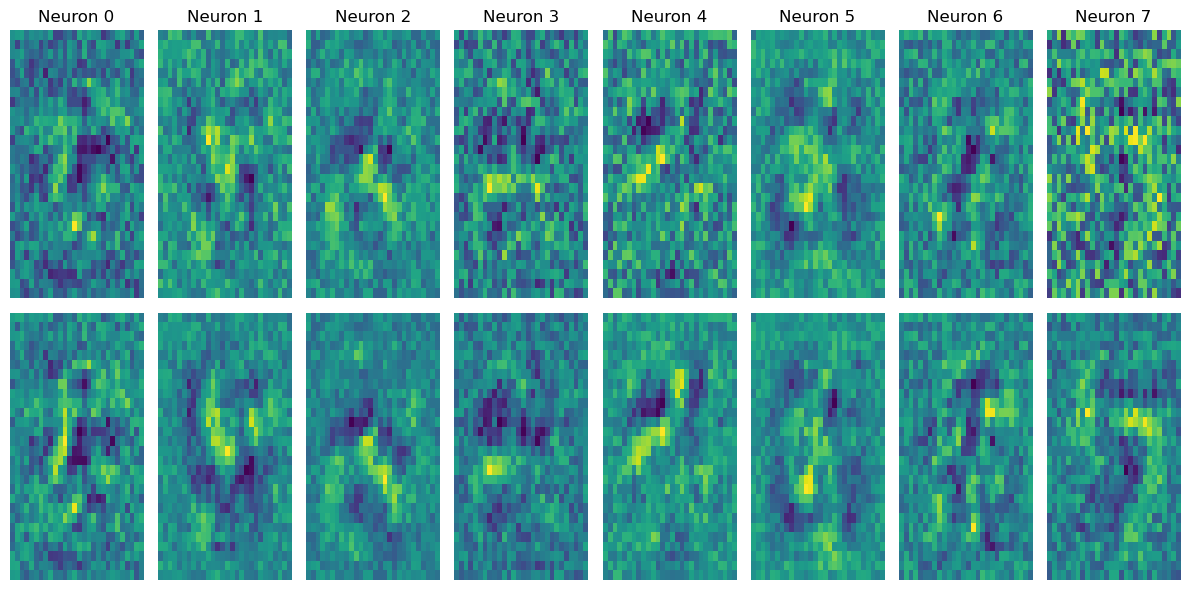

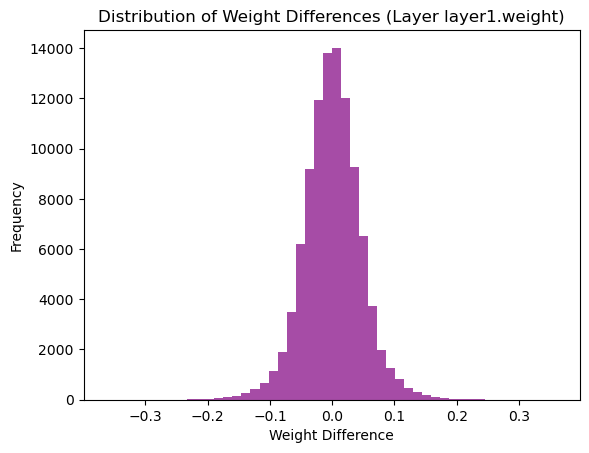

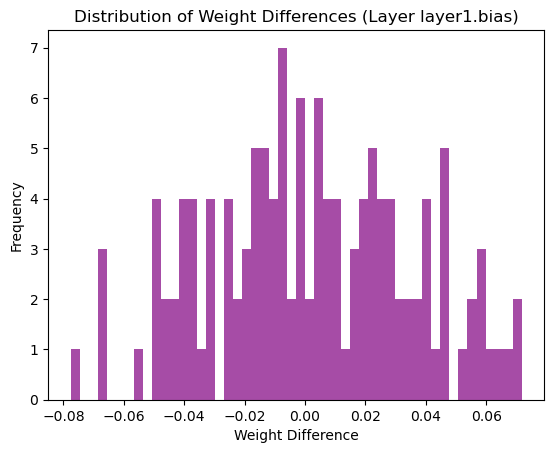

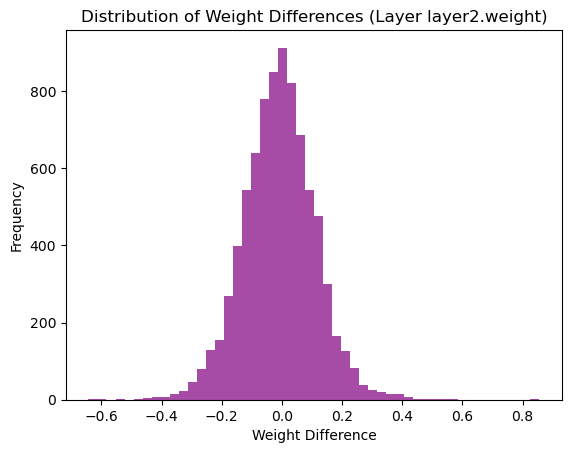

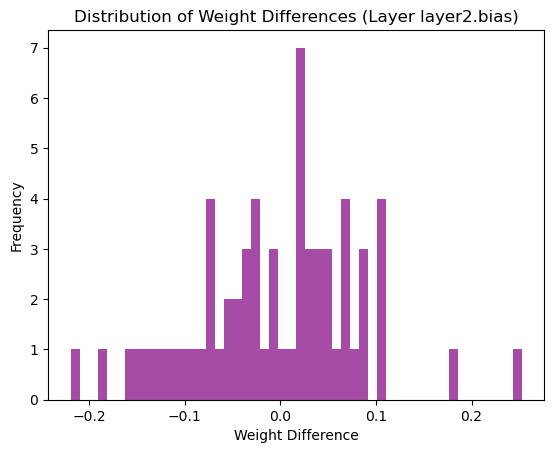

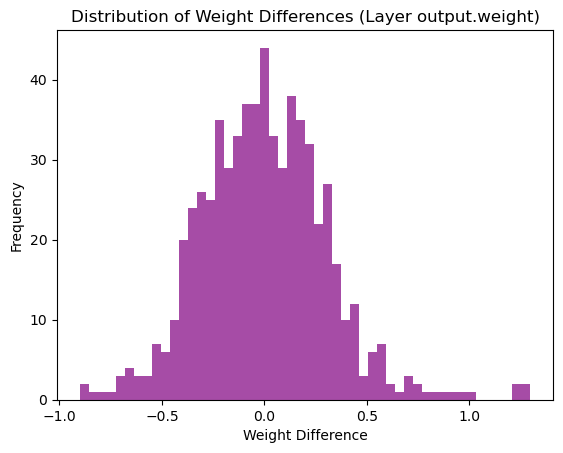

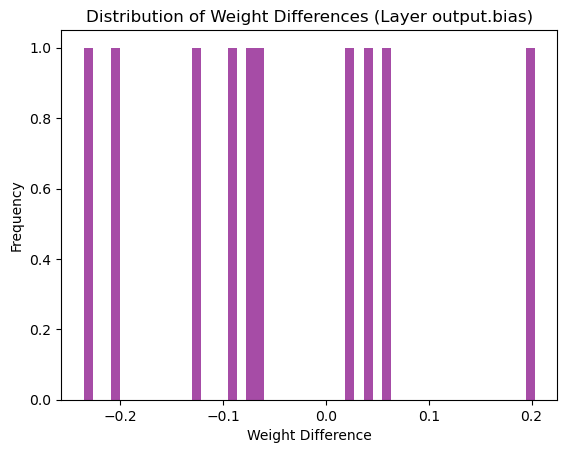

Total execution time = 257.97 seconds


In [2]:
# Visualize the results
df = generate_comparison_table(baseline_accuracy=baseline_accuracy, final_accuracy=final_accuracy, baseline_preds=baseline_preds, final_preds=final_preds, 
    true_labels=true_labels, baseline_losses=baseline_losses, final_losses=final_losses, baseline_training_time=step_2_time - step_1_time, 
    supervised_training_time=step_4_time - step_3_time)
visualize_weights(final_model, layer_index=1)
#plot_model_performance(final_accuracy, baseline_accuracy)
plot_loss_curves(baseline_losses, pretrained_losses, final_losses)
#plot_accuracy_curves([baseline_accuracy], [final_accuracy], [final_accuracy])
plot_confusion_matrices(true_labels, baseline_preds, pretrained_preds, final_preds)
plot_training_time(baseline_times, pretrained_times, final_times)
visualize_weights_evolution(final_weights, epochs=[0, len(final_weights) - 1], layer_index='layer1.weight')
plot_weight_differences(baseline_weights[-1], final_weights[-1])  # Assuming you want the final epoch weights for comparison

# Total time
print("Total execution time = {:.2f} seconds".format(step_4_time - start_time))